In [2]:
# Import the dependencies:
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline

In [8]:
amzn_sp500_df = pd.read_csv(
    Path('amzn_sp500_data.csv'),
    index_col='date',
    parse_dates=True,
    infer_datetime_format=True
)

display(amzn_sp500_df.head())
display(amzn_sp500_df.tail())

,AMZN,S&P 500
date,,
2014-05-20,301.19,1872.829956
2014-05-21,305.01,1888.030029
2014-05-22,304.91,1892.489990
2014-05-23,312.24,1900.530029
2014-05-27,310.82,1911.910034


,AMZN,S&P 500
date,,
2019-05-13,1822.68,2811.870117
2019-05-14,1840.12,2834.409912
2019-05-15,1871.15,2850.959961
2019-05-16,1907.57,2876.320068
2019-05-17,1869.00,2859.530029


In [3]:
# VARIANCE, COVARIANCE, & BETA
# A quantitative analyst can evaluate the risk that's associated with a group of assets by using the following metrics:
    # 1. VARIANCE: Measures the risk of a single asset by considering how far the closing prices deviate from their mean value.
    # 2. COVARIANCE: Considers the behavioral relationship between two assets (that is, whether the stock prices move in the same or opposite direction).
    # 3. BETA: Measures the directional relationship between a stock and the broader market.
# All three metrics are fundamental to building a diversified portfolio.    

In [4]:
# USING THE VARIANCE
# You never want all the stocks in a single portfolio to have a high-risk profile.
# Some should, but others should act as a hedge, or stabilizing force.
# Quantitative analysts use a volatility metric, called the variance, to help distinguish the riskier stocks from the more stable ones.
# The variance is the measurement of how far the numbers in a dataset spread around their mean.
    # For example: Say Stock A has an average price of $50 but varies from $5 to $90.
    # However, Stock B averages $50, but varies from $40 to $60.
    # Stock A exhibits a larger price range, and has a greater variance than Stock B, which has a narrower price range.

In [9]:
# CALCULATE THE VARIANCE
# In Pandas, we calculate the variance by referring to the column that we want followed by `var()`.
# Just like when we work with the standard deviation and the Sharpe Ratio, we use daily return values to calculate the variance, covariance, and the beta metrics.
# This makes it easier to compare stocks that might have wildly different prices.
# Let's begin by finding the daily returns for the `amzn_stock_df` DataFrame:
amzn_sp500_daily_returns = amzn_sp500_df.pct_change().dropna()

# Review the results for `amzn_sp500_daily_returns`:
display(amzn_sp500_daily_returns.head())
display(amzn_sp500_daily_returns.tail())

,AMZN,S&P 500
date,,
2014-05-21,0.012683,0.008116
2014-05-22,-0.000328,0.002362
2014-05-23,0.024040,0.004248
2014-05-27,-0.004548,0.005988
2014-05-28,-0.002123,-0.001114


,AMZN,S&P 500
date,,
2019-05-13,-0.035609,-0.024131
2019-05-14,0.009568,0.008016
2019-05-15,0.016863,0.005839
2019-05-16,0.019464,0.008895
2019-05-17,-0.020219,-0.005837


<AxesSubplot:title={'center':'AMAZON DAILY RETURNS IN RELATION TO THE S&P 500'}, xlabel='date'>

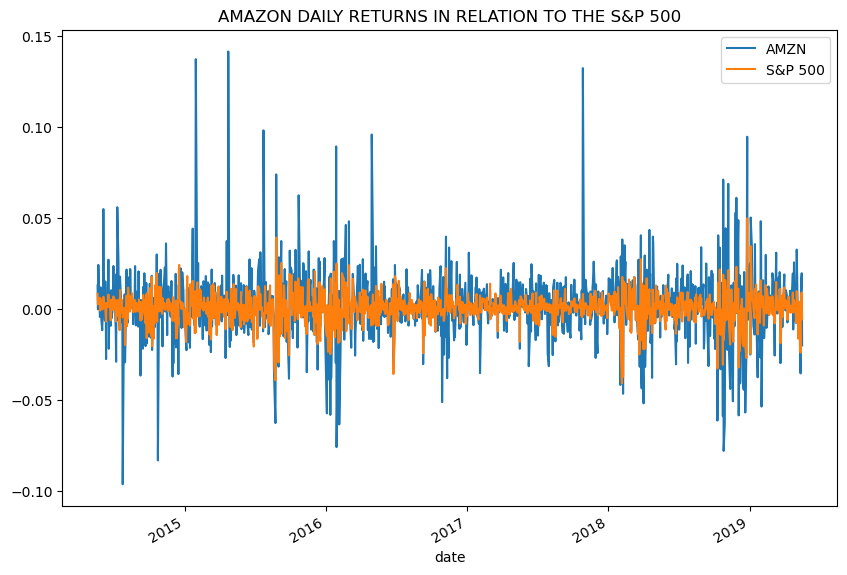

In [10]:
# Now that the daily returns have been calculated, let's plot the results:
amzn_sp500_daily_returns.plot(
    figsize=(10,7),
    title='AMAZON DAILY RETURNS IN RELATION TO THE S&P 500'
)

In [11]:
# PLOT SUMMARY:
# This plot reveals that AMZN is significantly more volatile than the S&P 500.
# Because the variance measures how far the data points spread around the mean, we expect AMZN to have a greater variance than the S&P 500.
# We can confirm this by using the `var()` function:
amzn_sp500_daily_returns.var()

AMZN       0.000363
S&P 500    0.000070
dtype: float64

In [13]:
# DEEP DIVE:
# As suspected, the results indicate that AMZN has a greater variance value than the S&P 500.
# An important point is that the variance measures the spread of the data points around the mean over a specified period of time.
# The variance of an asset changes because of both market conditions and company specific considerations, such as:
    # 1. Earnings
    # 2. Corporate announcements
    # 3. The competitive landscape
    
# For example, we can calculate the variance for AMZN and the S&P 500 from January 1, 2018 to the end of the dataset.
# Going back to the plot of the daily returns, we can observe that the specific time period seems volatile.
# Therefore, we can expect that the variance values from this period exceed those that we initially calculated:
daily_returns_2018_2019 = amzn_sp500_daily_returns.loc['2018-01-01':]

# Review the variance results:
daily_returns_2018_2019.var()

AMZN       0.000457
S&P 500    0.000102
dtype: float64

In [14]:
# DEEP DIVE SUMMARY:
# Notice that the variance of AMZN exceeds that of the first calculation. 
# This indicates that AMZN was more volatile in this later time period than it was over the entire period of the dataset.
# Notice that this same trend applies to the S&P 500.
# Now we can compare the magnitude of the change between the two assets:
# Over the whole period, the difference in the variance between AMZN/S&P500 was 0.000293 (0.000363 - 0.000070)
# Over the shorter period, it was 0.000355 (0.000457 - 0.000102).
# This indicates that AMZN was more volatile than the market during the 2018-2019 time period than it was over the whole period.

In [15]:
# USING THE COVARIANCE:
# The covariance measures the directional relationship between two variables.
# It's a useful metric in quantitative analysis because it allows us to examine how an asset's risk moves in relation to another asset's risk.
# If the covariance between two stocks is positive, their prices tend to similarly move up and down on a day to day basis.
# For example, Coca Cola and Pepsi, or General Motors and Ford will likely have a positive covariance because they are within the same industry.
# If the covariance is negative, the prices of the stocks tend to move inversely.
# That is, when one goes up, the other goes down and vice versa.
# Stocks and bonds provide the go-to example of assets with a negative covariance.
# Another might consist of a high-flying tech stock, like Tesla, and a consumer product stock like Proctor & Gamble.
# We can use the covariance to determine how a stock trades relative to the broader market.
# A well-constructed, diversified portfolio contains some stocks with a positive market covariance and some with a negative market covariance.
# We can then have solid investment performance while managing the risk profile of the portfolio.

In [16]:
# ON THE JOB:
# Traditionally, stocks and bonds have had a negative covariance.
# If stock prices crash, bond prices should rise.
# The rising price of bonds should help stabilize or protect the overall value of the portfolio from the decline in stock prices.
# In investment lingo, we say that the bond portion of the portfolio offers DOWNSIDE PROTECTION against the stock portion.

In [18]:
# CALCULATE THE COVARIANCE
# To measure the covariance between two assets, we can use the pandas `cov()` function.
# The following code calculates the covariance between Amazon and the S&P 500 using the daily returns data:
amzn_spx_covariance = amzn_sp500_daily_returns['AMZN'].cov(amzn_sp500_daily_returns['S&P 500'])

# Review the covariance results:
print(f'{amzn_spx_covariance: .8f}')

 0.00009344


In [20]:
# COVARIANCE CALCULATION SUMMARY:
# With the covariance, we're more interested in whether it's positive or negative tahn we are in the actual number.
# In the case of the AMZN covariance with the S&P 500, it's positive.
# This indicates that AMZN prices move in the same direction as the prices of the S&P 500.
# This is not surprising, because AMZN is one of the five largest stocks in the S&P 500.

In [21]:
# USING THE BETA
# The beta measures how much an asset's return value is likely to change relative to changes in the overall market's return value:
    # 1. A beta of 1.0 indicates that the asset's return value will likely be exactly the same as that of the market.
    # 2. A beta that's greater than 1.0 indicates that the change in the asset's return value will likely be greater than the change in the market's return value.
    # 3. A beta that's less than 1.0 indicates that the change in the asset's return value will likely be less than that of the market.
# Let's explore this metric in more detail by comparing the AMZN return to the S&P 500 return:
    # 1. If AMZN has a beta of 1.00, for every 1% change in the S&P 500 return value, the AMZN return value will likely change by 1%.
    # 2. If AMZN has a beta of 1.25, for every 1% change in the S&P 500 return value, the AMZN return value will likely change by 1.25%.
    # 3. If AMZN has a beta of 0.50, for every 1% change in the S&P 500 return value, the AMZN return value will likely change by 0.50%.
# In terms of risk, the more that an asset's beta exceeds 1.0, the greater the risk of that asset.
# This is because the asset's movement is more volatile and uncertain than the overall market.

In [22]:
# CALCULATE THE BETA
# To calculate the beta, we divide the covariance of an asset (that is the asset's relationship to the market) by the variance of the market:
    # Beta = Cov(RaRm) / Var(Rm)
    # Cov(RaRm) - Covariance between an asset and the market.
    # Var(Rm) - Variance of the market
# The beta supplies a standard that we use to compare the risk and return among investments.
# Let's apply this calculation to Amazon stock and the S&P 500:

# Divide the covariance of AMZN versus the SP500 by the varaiance of the SP500
amzn_beta = amzn_sp500_daily_returns['AMZN'].cov(amzn_sp500_daily_returns['S&P 500']) / amzn_sp500_daily_returns['S&P 500'].var()

# Review the AMZN beta:
amzn_beta

1.3290230173974698

In [ ]:
# BETA SUMMARY:
# Because the AMZN beta calculation of 1.329 is greater than 1.0, we expect the return on AMZN to be more volatile than the market.
# In a perfect world, if the market went up or down by 1%, the AMZN price would go up or down by 1.329%.
# However, that's not likely. Sometimes, the AMZN stock will return more than 1.329% of the market's move, and sometimes it will return less.
# This is where the uncertainty arises.
# The higher the beta, the greater the variability in a stock's expected move relative the market.